In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
img = cv2.imread('/content/pxfuel (11).jpg')
img.shape

(720, 1280, 3)

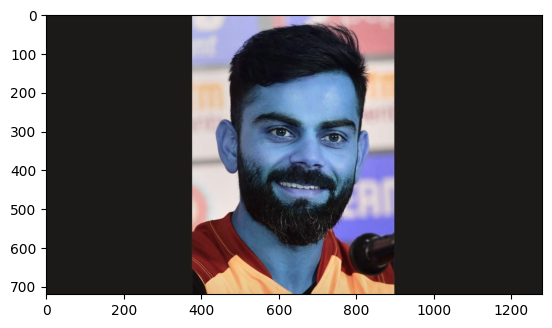

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(720, 1280)

In [ ]:
gray

array([[26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       ...,
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26]], dtype=uint8)

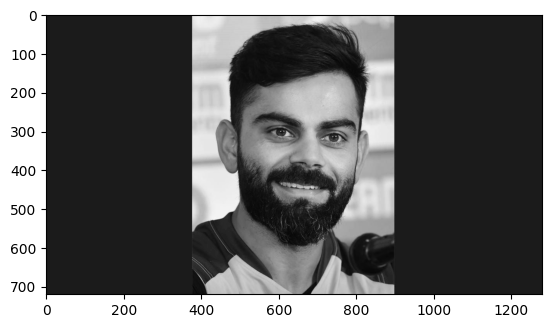

In [ ]:
plt.imshow(gray,cmap='gray')


In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[468, 146, 404, 404]], dtype=int32)

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

(468, 146, 404, 404)

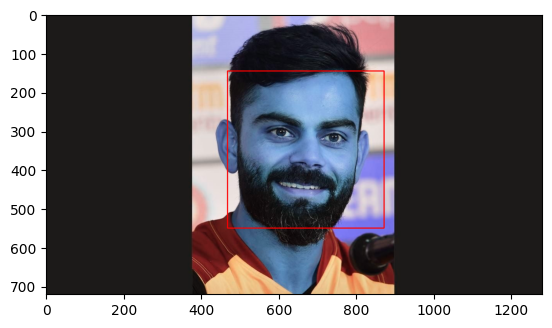

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

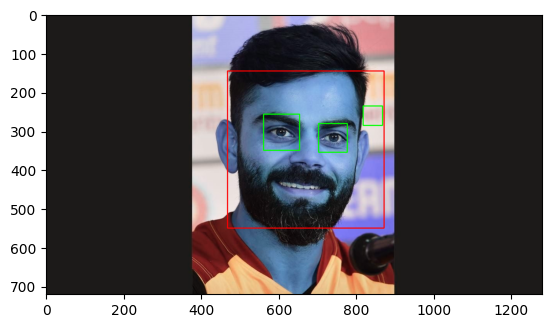

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

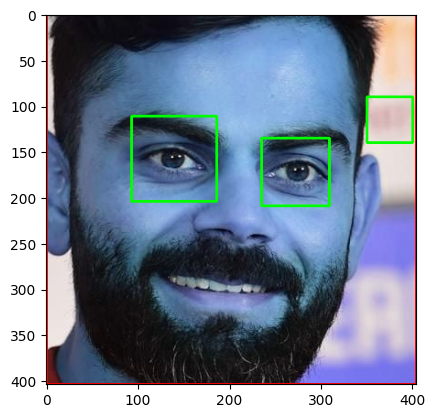

In [ ]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    if len(eyes) >= 2:
      return roi_color

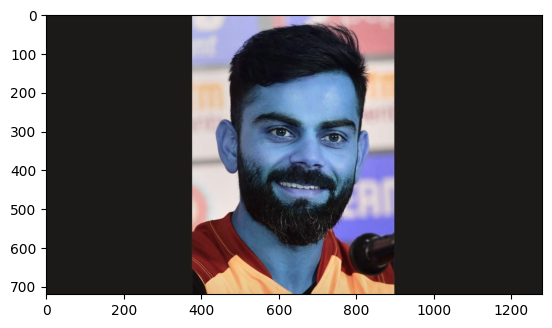

In [ ]:
original_image = cv2.imread('/content/pxfuel (11).jpg')
plt.imshow(original_image)

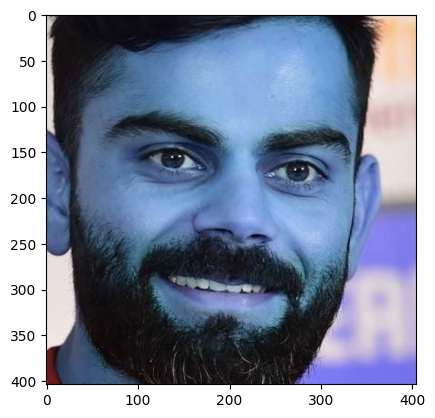

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('/content/pxfuel (11).jpg')
plt.imshow(cropped_image)

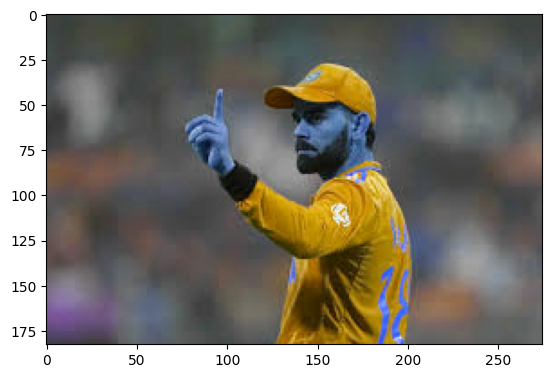

In [ ]:
original_image = cv2.imread('/content/images.jpeg')
plt.imshow(original_image)

In [ ]:
cropped_image_no_eyes = get_cropped_image_if_2_eyes('/content/images.jpeg')
cropped_image_no_eyes

In [ ]:
path_to_data = '/content/drive/MyDrive/Image Dataset'
path_to_cr_data = path_to_data + '/cropped'

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
{
    'The_Rock': [
        '/content/drive/MyDrive/Image Dataset/cropped/Rock/Rock1.png',
        '/content/drive/MyDrive/Image Dataset/cropped/Rock/Rock2.png',
    ],
    'Virat_Kohli': [
        '/content/drive/MyDrive/Image Dataset/cropped/Kohli/Kohli1.png',
        '/content/drive/MyDrive/Image Dataset/cropped/Kohli/Kohli2.png',
    ]
}

{'The_Rock': ['/content/drive/MyDrive/Image Dataset/cropped/Rock/Rock1.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Rock/Rock2.png'],
 'Virat_Kohli': ['/content/drive/MyDrive/Image Dataset/cropped/Kohli/Kohli1.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Kohli/Kohli2.png']}

In [ ]:
import os
import cv2

cropped_image_dirs = []
celebrity_file_names_dict = {}

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image at {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ", cropped_folder)

                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1


Roger Federer
Generating cropped images in folder:  /content/drive/MyDrive/Image Dataset/cropped/Roger Federer
Serena Williams
Generating cropped images in folder:  /content/drive/MyDrive/Image Dataset/cropped/Serena Williams
The Rock
Generating cropped images in folder:  /content/drive/MyDrive/Image Dataset/cropped/The Rock
Virat Kohli
Generating cropped images in folder:  /content/drive/MyDrive/Image Dataset/cropped/Virat Kohli


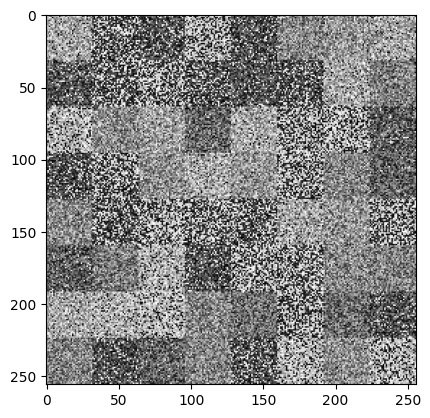

In [ ]:
import numpy as np
import pywt
import cv2
import matplotlib.pyplot as plt

def w2d(img, mode='haar', level=1):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Convert to float
    grayFloat = np.float32(gray)
    # Compute coefficients
    coeffs = pywt.wavedec2(grayFloat, mode, level=level)

    # Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    # Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

# Assuming cropped_image is defined and contains the image data
# im_har = w2d(cropped_image, 'db1', 5)

# For demonstration, let's create a sample image using NumPy
cropped_image = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)

im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')
plt.show()


In [ ]:
celebrity_file_names_dict

{'Roger Federer': ['/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer1.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer2.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer3.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer4.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer5.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer6.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer7.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer8.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer9.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer10.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger Federer11.png',
  '/content/drive/MyDrive/Image Dataset/cropped/Roger Federer/Roger 

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Roger Federer': 0, 'Serena Williams': 1, 'The Rock': 2, 'Virat Kohli': 3}

In [ ]:
X = []
Y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
          continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(cropped_image, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack([scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)])
        X.append(combined_img)
        Y.append(class_dict[celebrity_name])

In [ ]:
len(X[0])

4096

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(78, 4096)

In [ ]:
X[0]

array([ 14.,  23.,  33., ..., 180., 128., 171.])

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.52

In [ ]:
len(X_test)

25

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57        12
           1       0.56      0.38      0.45        13

    accuracy                           0.52        25
   macro avg       0.53      0.53      0.51        25
weighted avg       0.53      0.52      0.51        25



In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import pywt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

%matplotlib inline

# Define paths
path_to_data = '/content/drive/MyDrive/Image Dataset'
path_to_cr_data = path_to_data + '/cropped'

# Create Haar Cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to detect and crop faces with at least 2 eyes
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image at {image_path}")
        return None
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    return None

# Collect image directories
img_dirs = [entry.path for entry in os.scandir(path_to_data) if entry.is_dir()]

# Ensure the cropped data directory exists
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

# Dictionary to store file paths
celebrity_file_names_dict = {}

# Process and save cropped images
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file() and entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)

                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

# Function for wavelet transform
def w2d(img, mode='haar', level=1):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_float = np.float32(gray)
    coeffs = pywt.wavedec2(gray_float, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    return imArray_H

# Prepare the dataset
X = []
Y = []
class_dict = {}
count = 0

for celebrity_name, training_files in celebrity_file_names_dict.items():
    class_dict[celebrity_name] = count
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack([scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)])
        X.append(combined_img)
        Y.append(count)
    count += 1

X = np.array(X).reshape(len(X), 4096).astype(float)
Y = np.array(Y)

# Train and evaluate SVM classifier
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)

# Display the score and classification report
score = pipe.score(X_test, y_test)
print(f"Model Accuracy: {score}")
print(classification_report(y_test, pipe.predict(X_test)))


Roger Federer
Serena Williams
The Rock
Virat Kohli
cropped
Model Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5
           2       0.80      1.00      0.89         4
           3       1.00      0.88      0.93         8

    accuracy                           0.90        20
   macro avg       0.91      0.89      0.88        20
weighted avg       0.92      0.90      0.90        20



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

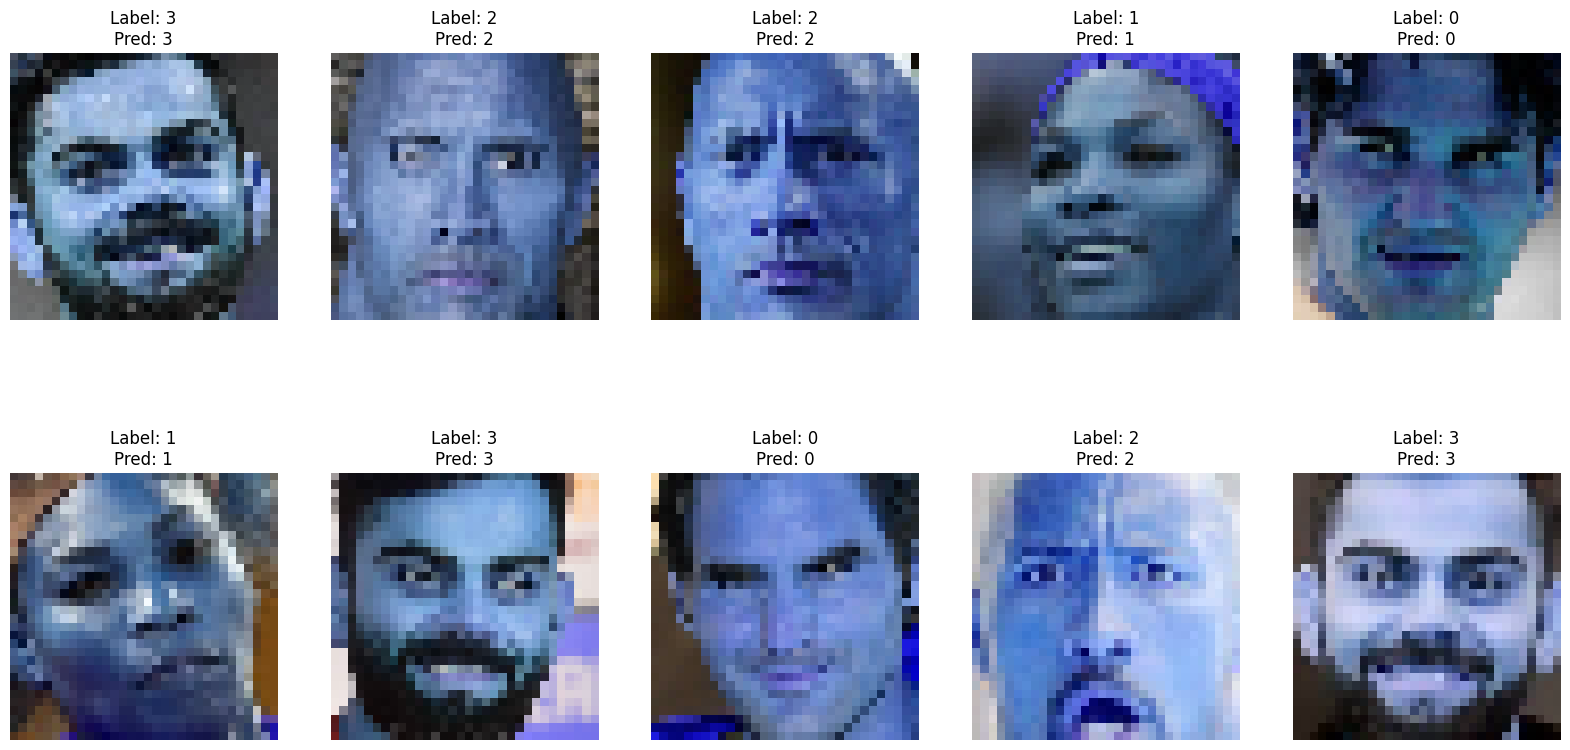

In [ ]:
import matplotlib.pyplot as plt

def plot_sample_images(images, labels, predictions=None, n=10):
    plt.figure(figsize=(20, 10))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        # Separate the raw image part and wavelet-transformed part
        raw_image = images[i][:32*32*3].reshape(32, 32, 3).astype(np.uint8)
        wavelet_image = images[i][32*32*3:].reshape(32, 32).astype(np.uint8)

        # Plot the raw image
        plt.imshow(raw_image)
        title = f"Label: {labels[i]}"
        if predictions is not None:
            title += f"\nPred: {predictions[i]}"
        plt.title(title)
        plt.axis('off')
    plt.show()

# Fetch some sample images from the test set
sample_indices = np.random.choice(len(X_test), 10, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]
sample_predictions = pipe.predict(sample_images)

# Plot sample images with their true and predicted labels
plot_sample_images(sample_images, sample_labels, sample_predictions)


In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.827273,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.637879,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.862121,{'logisticregression__C': 1}


In [ ]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.9

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.7

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[2, 0, 1, 0],
       [0, 5, 0, 0],
       [0, 0, 4, 0],
       [0, 1, 0, 7]])

Text(95.72222222222221, 0.5, 'Truth')

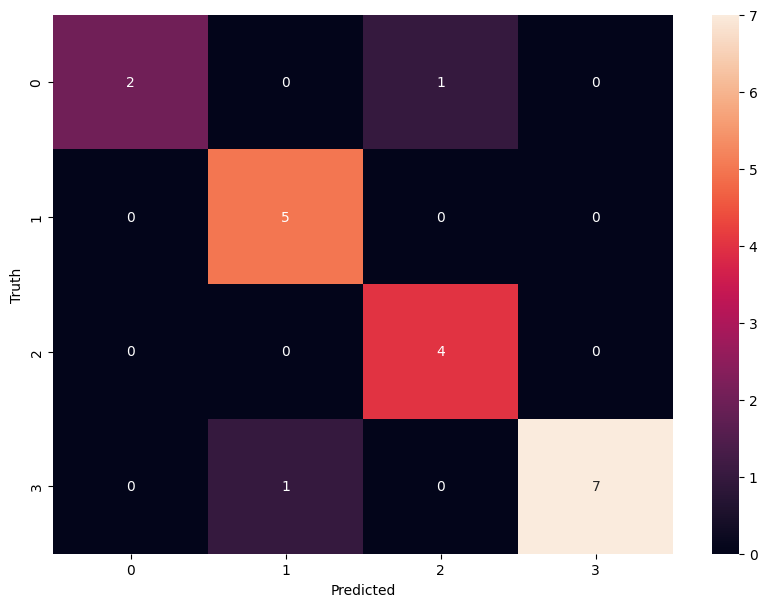

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'Roger Federer': 0,
 'Serena Williams': 1,
 'The Rock': 2,
 'Virat Kohli': 3,
 'cropped': 4}

In [ ]:
!pip install joblib
import joblib
# Save the model as a pickle file
filename = 'saved_model.pkl'
joblib.dump(best_clf, filename)

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [ ]:
%cd /content/drive/My\ Drive/server
from google.colab import files
files.download('saved_model.pkl')
files.download('class_dictionary.json')


[Errno 2] No such file or directory: '/content/drive/My Drive/server'
/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>